In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumGothic')


#값 불러오기
# read_csv를 사용하여 DataFrame형태로 불러오기
jeju_card_df = pd.read_csv('jeju_card.csv')

#DataFrame의 크기 출력 .shape
#DataFrame의 처음/ 마지막 다섯줄 출력 .head/ .tail
#DataFrame의 데이터 타입과 (nun-null)데이터의 개수 확인 .info()
jeju_card_df.shape

#object타입 컬럼들의 이름을 변수에 저장
object_columns = jeju_card_df.columns[jeju_card_df.dtypes == 'object']
object_columns
# --> Index(['시도명', '시군구명', '지역구분', '업종명', '이용자 구분', '연령대', '성별', '연월'], dtype='object')
# index라는 자료형이지만 리스트처럼 안의 요소에 차례로 접근 가능

# 칼럼별로 유니크한 값들 출력
for col in object_columns:
    print(col)
    print(jeju_card_df[col].unique(), '\n')

시도명
['제주도'] 

시군구명
['제주시' '서귀포시'] 

지역구분
['읍면' '도심'] 

업종명
['유흥' '식음료' '숙박' '쇼핑' '소매' '문화/레져' '교통' '기타'] 

이용자 구분
['제주도민' '내국인관광객'] 

연령대
['60대이상' '50대' '40대' '30대' '20대미만' '20대' '20 미만'] 

성별
['여' '남'] 

연월
['2018-12' '2018-11' '2018-10' '2018-09' '2018-08' '2018-07' '2018-06'
 '2018-05' '2018-04' '2018-03' '2018-02' '2018-01' '2017-12' '2017-11'
 '2017-10' '2017-09' '2017-08' '2017-07' '2017-06' '2017-05' '2017-04'
 '2017-03' '2017-02' '2017-01' '2016-12' '2016-11' '2016-10' '2016-09'] 



In [3]:
#연월에서 연도만 분리( '-' 제거) 후 2016 삭제
jeju_card_df["연도"] = jeju_card_df['연월'].str.split('-').str[0]
jeju_card_df = jeju_card_df[jeju_card_df['연도'] != '2016']
jeju_card_df['연도'].unique()


array(['2018', '2017'], dtype=object)

In [4]:
# 연령대의 '20대 미만'과 '20 미만' 은 모두 미성년자를 의미
jeju_card_df.loc[jeju_card_df['연령대'] == "20 미만", '연령대'] = '20대 미만'
jeju_card_df.loc[jeju_card_df['연령대'] == "20대미만"].reset_index(drop=True)
jeju_card_df['연령대'].unique()

array(['60대이상', '50대', '40대', '30대', '20대미만', '20대', '20대 미만'],
      dtype=object)

In [5]:
#다스(Pandas)의 .groupby(컬럼) 메서드는 앞서 언급한 바와 같이 데이터를 
#특정 기준으로 그룹화하여 처리할 수 있는 기능 덕분에, 
#데이터 전처리/분석 시 유용하게 활용할 수 있습니다.
groupby_ym = jeju_card_df.groupby('연월').sum(numeric_only=True).reset_index()
groupby_ym

,연월,이용자수,이용횟수,이용금액
0,2017-01,2044697,3962878,158062633602
1,2017-02,1937989,3686906,142673272629
2,2017-03,2139087,4265024,158170622304
3,2017-04,2261037,4428571,164145266282
4,2017-05,2422539,4744952,174450463090
5,2017-06,2328383,4606602,166023890619
6,2017-07,2520117,5048178,177270011408
7,2017-08,2634037,5212389,178853518885
8,2017-09,2374142,4765159,168355520204
9,2017-10,2270758,4453613,164810287642


Text(0, 0.5, '이용금액(억)')

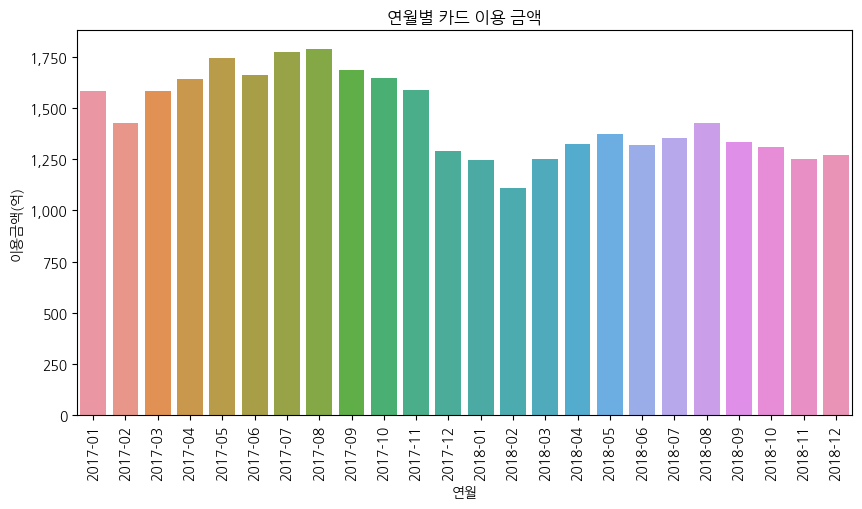

In [6]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.barplot(data=groupby_ym, x='연월', y='이용금액')
plt.xticks(rotation=90)
plt.title('연월별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')


In [7]:
# 17,18년도의 이용금액 비교를 위해 연도와 연령대를 groupby로 묶어주기
groupby_ym_age = jeju_card_df.groupby(['연도', '연령대']).sum(numeric_only=True).reset_index()
groupby_ym_age

,연도,연령대,이용자수,이용횟수,이용금액
0,2017,20대,4800559,9304114,208175160124
1,2017,20대 미만,194020,407990,4759356067
2,2017,20대미만,9058,21906,237301545
3,2017,30대,7080363,13499213,437721213544
4,2017,40대,6965143,14414930,561248406540
5,2017,50대,5158034,10314259,468286978356
6,2017,60대이상,2640430,5069478,260136246561
7,2018,20대,4262563,8714136,175770246392
8,2018,20대미만,216056,475236,5027234286
9,2018,30대,5759053,11372820,320955678476


In [8]:
jeju_card_df['연령대'] = pd.Categorical(jeju_card_df['연령대'], categories=['20대미만', '20대','30대','40대','50대','60대이상'],ordered=True)

Text(0, 0.5, '이용금액(억)')

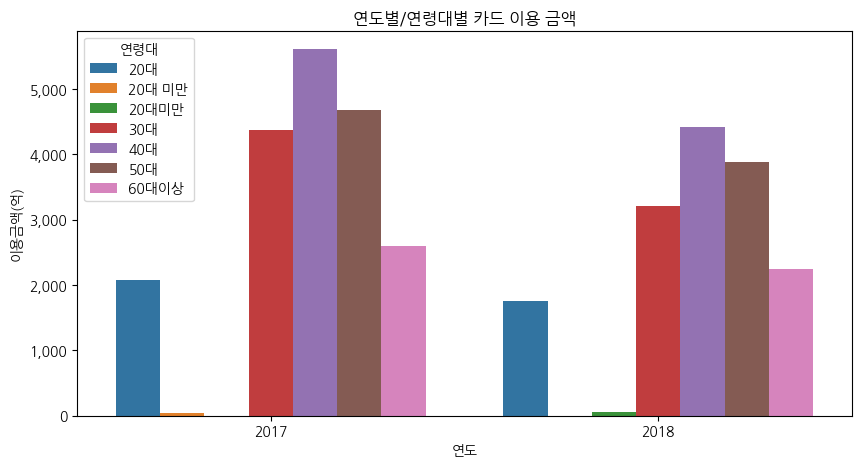

In [9]:
sns.barplot(data=groupby_ym_age, x='연도', y='이용금액', hue='연령대')
plt.title('연도별/연령대별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

In [10]:
# 제주도민과 내국인 관광객 비교
groupby_ym_user = jeju_card_df.groupby(['연도','이용자 구분']).sum(numeric_only=True).reset_index()
groupby_ym_user

,연도,이용자 구분,이용자수,이용횟수,이용금액
0,2017,내국인관광객,12761026,20113119,754434825907
1,2017,제주도민,14086581,32918771,1186129836830
2,2018,내국인관광객,11179654,17830178,633357078211
3,2018,제주도민,12241253,30011987,922893881613


Text(0, 0.5, '이용금액(억)')

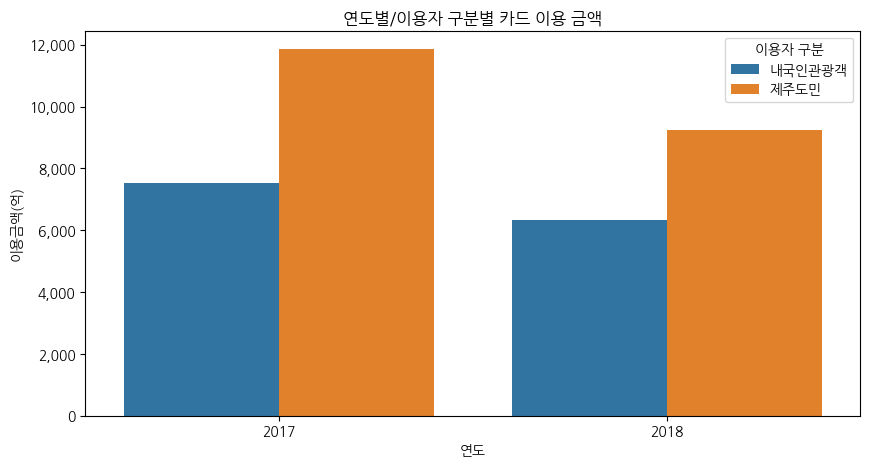

In [11]:
sns.barplot(data=groupby_ym_user, x='연도', y='이용금액', hue='이용자 구분')
plt.title('연도별/이용자 구분별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

Text(0, 0.5, '이용금액(억)')

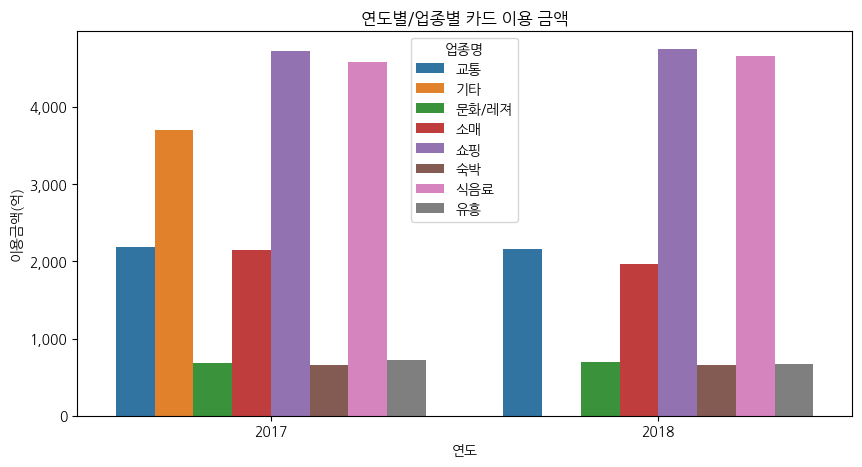

In [12]:
groupby_ym_market = jeju_card_df.groupby(['연도', '업종명']).sum(numeric_only=True).reset_index()

sns.barplot(data=groupby_ym_market, x='연도', y='이용금액', hue='업종명')
plt.title('연도별/업종별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

In [13]:
jeju_card_df[jeju_card_df['업종명'] == '기타']

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액,연도
8820,제주도,제주시,읍면,기타,제주도민,60대이상,여,2017-11,515,1087,68991695,2017
8821,제주도,제주시,읍면,기타,제주도민,60대이상,남,2017-11,1320,2902,248832140,2017
8822,제주도,제주시,읍면,기타,제주도민,50대,여,2017-11,825,1586,105991421,2017
8823,제주도,제주시,읍면,기타,제주도민,50대,남,2017-11,1623,3314,344444658,2017
8824,제주도,제주시,읍면,기타,제주도민,40대,여,2017-11,1064,1955,197205323,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
16682,제주도,서귀포시,도심,기타,내국인관광객,30대,여,2017-01,1126,1661,61983110,2017
16683,제주도,서귀포시,도심,기타,내국인관광객,30대,남,2017-01,1289,1902,54641270,2017
16684,제주도,서귀포시,도심,기타,내국인관광객,20대,여,2017-01,795,1060,29265651,2017
16685,제주도,서귀포시,도심,기타,내국인관광객,20대,남,2017-01,719,987,19987700,2017


In [16]:
jeju_card_df[jeju_card_df['업종명'] == '기타']['연월'].unique()

array(['2017-11', '2017-10', '2017-09', '2017-08', '2017-07', '2017-06',
       '2017-05', '2017-04', '2017-03', '2017-02', '2017-01'],
      dtype=object)

In [19]:
jeju_card_df = jeju_card_df[jeju_card_df['업종명'] != '기타']

/tmp/ipykernel_117/4206172065.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_ym_age = jeju_card_df.groupby(['연도', '연령대']).sum(numeric_only=True).reset_index()


Text(0, 0.5, '이용금액(억)')

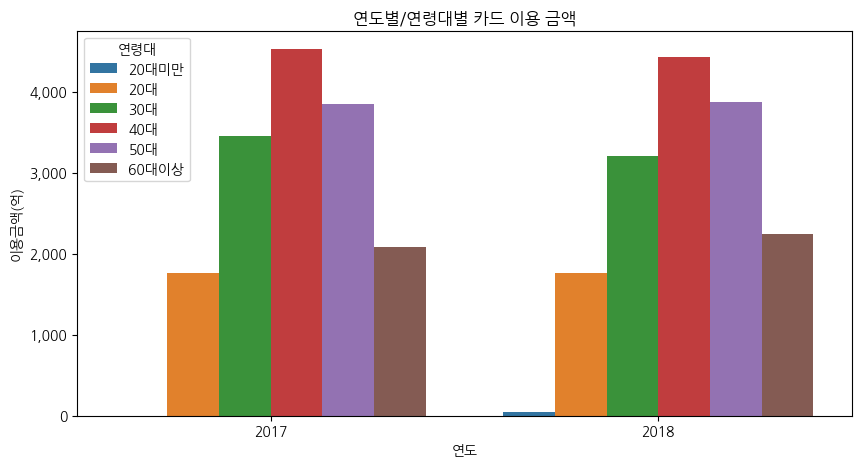

In [23]:
groupby_ym_age = jeju_card_df.groupby(['연도', '연령대']).sum(numeric_only=True).reset_index()

sns.barplot(data=groupby_ym_age, x='연도', y='이용금액', hue='연령대')
plt.title('연도별/연령대별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

Text(0, 0.5, '이용금액(억)')

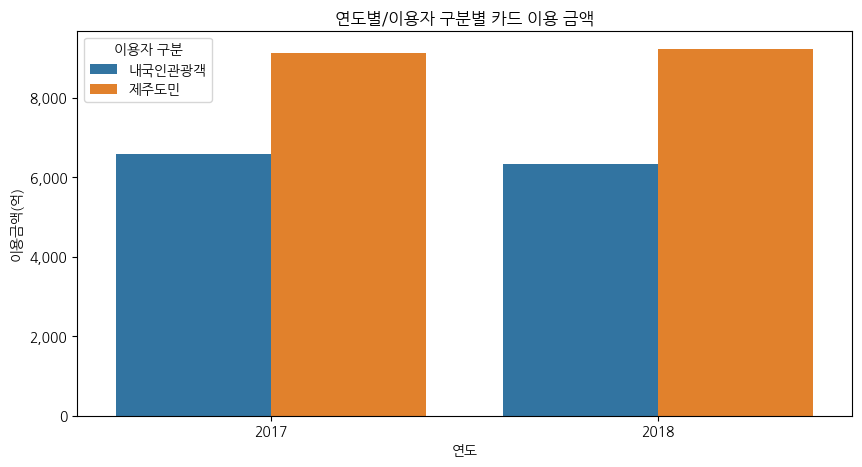

In [24]:
groupby_ym_user = jeju_card_df.groupby(['연도', '이용자 구분']).sum(numeric_only=True).reset_index()

sns.barplot(data=groupby_ym_user, x='연도', y='이용금액', hue='이용자 구분')
plt.title('연도별/이용자 구분별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

Text(0, 0.5, '이용금액(억)')

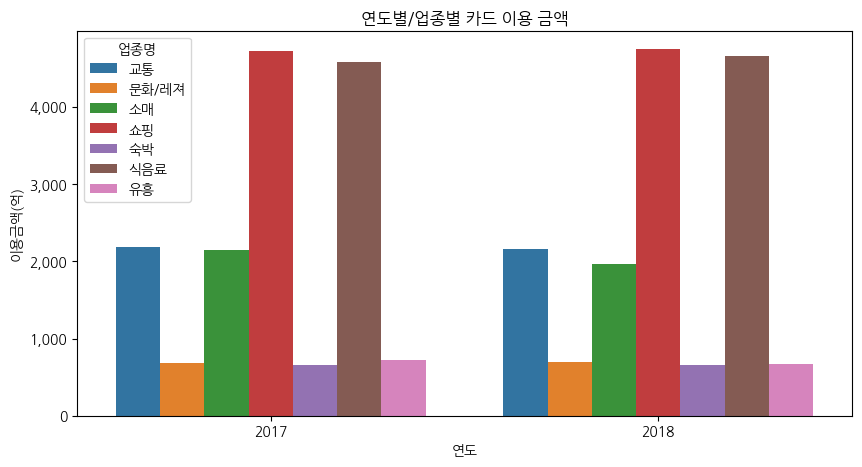

In [28]:
groupby_ym_market = jeju_card_df.groupby(['연도', '업종명']).sum(numeric_only=True).reset_index()

sns.barplot(data=groupby_ym_market, x='연도', y='이용금액', hue='업종명')
plt.title('연도별/업종별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

In [39]:
# 연령대별 이용 금액 시각화
groupby_age = jeju_card_df.groupby('연령대').sum(numeric_only=True).reset_index()
groupby_age

/tmp/ipykernel_117/1770152186.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_age = jeju_card_df.groupby('연령대').sum(numeric_only=True).reset_index()


,연령대,이용자수,이용횟수,이용금액
0,20대미만,225114,497142,5264535831
1,20대,8609569,17330083,352340324557
2,30대,11943645,23231348,665648456005
3,40대,12151108,25588896,894568725640
4,50대,9141502,18600897,771684016455
5,60대이상,4683296,9062038,433293299324


Text(0.5, 1.0, '연령대별 카드 이용자 수 비용')

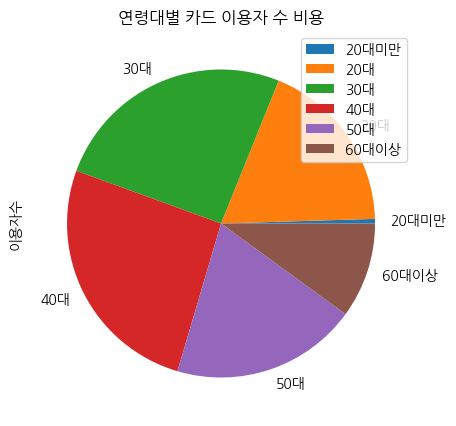

In [43]:
# 파이차트를 활용한 시각화
groupby_age.plot(kind='pie', y='이용자수', labels=groupby_age['연령대'])
plt.title('연령대별 카드 이용자 수 비용')

,연령대,이용자수,이용횟수,이용금액
0,20대미만,225114,497142,5264535831
1,20대,8609569,17330083,352340324557
2,30대,11943645,23231348,665648456005
3,40대,12151108,25588896,894568725640
4,50대,9141502,18600897,771684016455
5,60대이상,4683296,9062038,433293299324


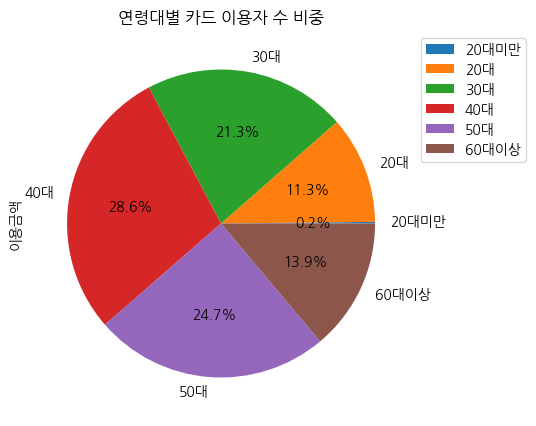

In [51]:
# 위의 파이차트에서 구분되지 않는 경우, %활용
# autopct라는 파라미터 사용하면 조각이 전체 몇 퍼센트 차지하는지 확인 가능
# 

groupby_age.plot(kind='pie', y='이용금액', labels=groupby_age['연령대'], autopct= '%.1f%%')
plt.title('연령대별 카드 이용자 수 비중')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
groupby_age

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


,연령대,이용자수,이용횟수,이용금액,인당이용금액
0,20대미만,225114,497142,5264535831,23386.088075
1,20대,8609569,17330083,352340324557,40924.269793
2,30대,11943645,23231348,665648456005,55732.438130
3,40대,12151108,25588896,894568725640,73620.341918
4,50대,9141502,18600897,771684016455,84415.451252
5,60대이상,4683296,9062038,433293299324,92518.879721


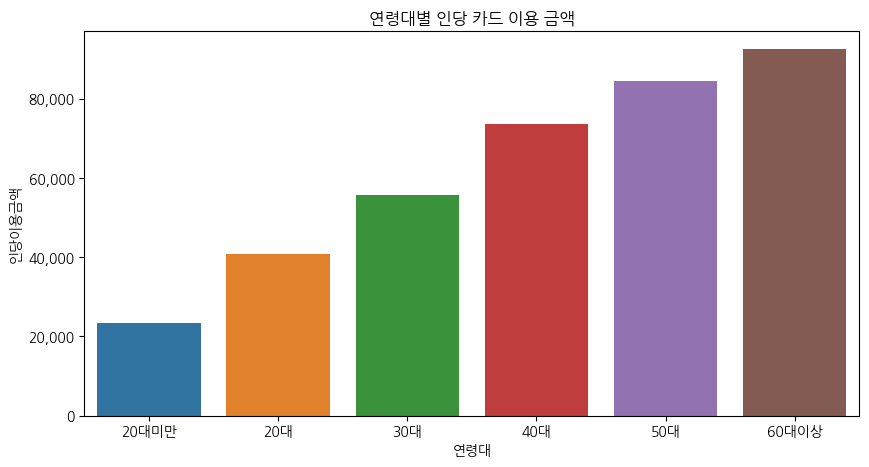

In [59]:
groupby_age['인당이용금액'] = groupby_age['이용금액'] / groupby_age['이용자수']

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
sns.barplot(data=groupby_age, x='연령대', y='인당이용금액')
plt.title('연령대별 인당 카드 이용 금액')
groupby_age

/tmp/ipykernel_117/856119085.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_age_market = jeju_card_df.groupby(['연령대', '업종명']).sum(numeric_only=True).reset_index()
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior 

,연령대,업종명,이용자수,이용횟수,이용금액
0,20대미만,교통,2545,3023,177380619
1,20대미만,문화/레져,24355,53674,498365362
2,20대미만,소매,29861,40655,827081065
3,20대미만,쇼핑,91331,252573,1645936764
4,20대미만,숙박,2760,3734,84160060


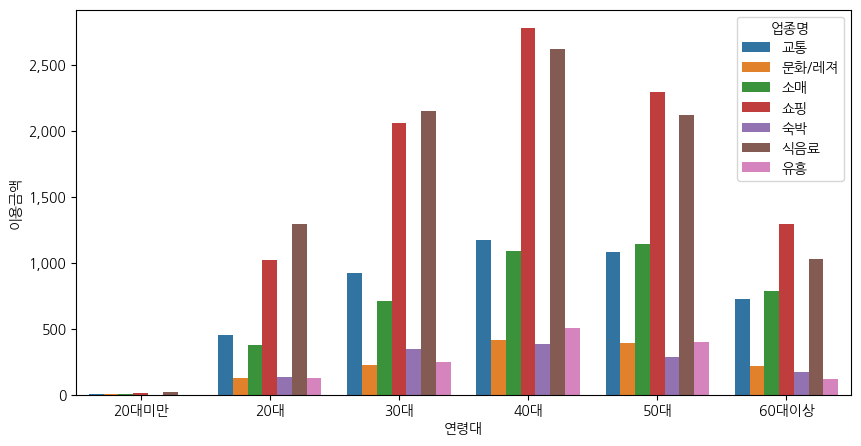

In [63]:
# 연령대별/업종별 이용금액 시각화

groupby_age_market = jeju_card_df.groupby(['연령대', '업종명']).sum(numeric_only=True).reset_index()
sns.barplot(data=groupby_age_market, x='연령대', y='이용금액', hue='업종명')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
groupby_age_market.head()

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 1.0, '연령대별/업종별 인당 카드 이용 금액')

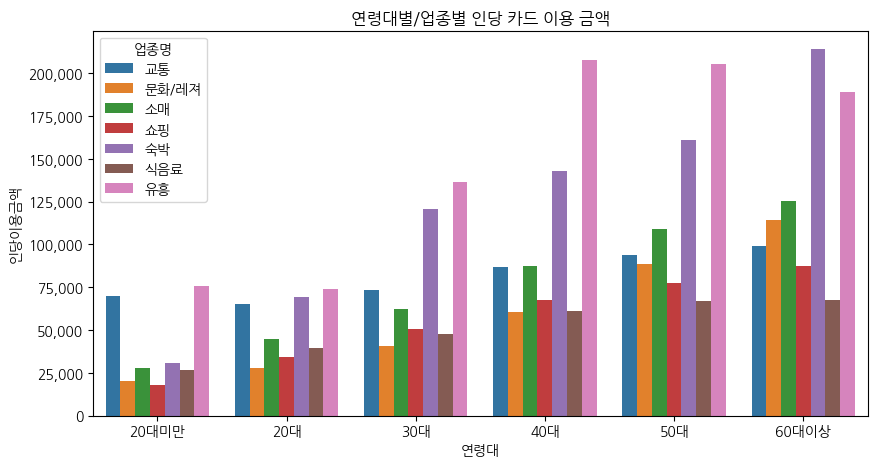

In [67]:
groupby_age_market['인당이용금액'] = groupby_age_market['이용금액'] / groupby_age_market['이용자수']

sns.barplot(data=groupby_age_market, x='연령대', y='인당이용금액', hue='업종명')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.title('연령대별/업종별 인당 카드 이용 금액')

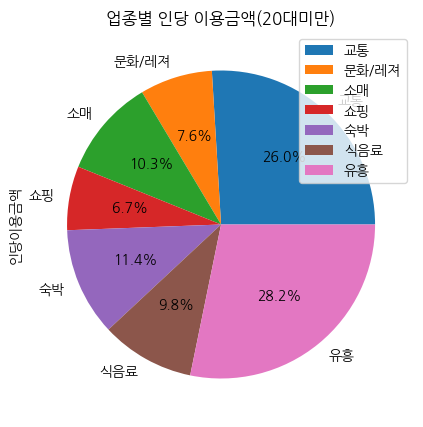

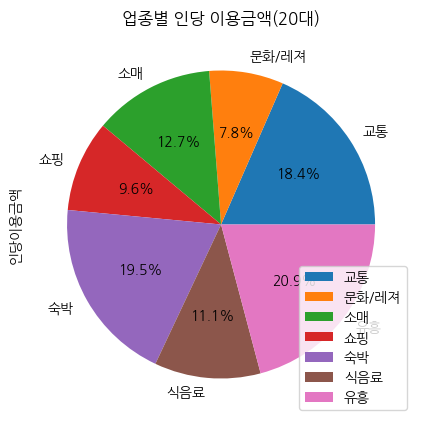

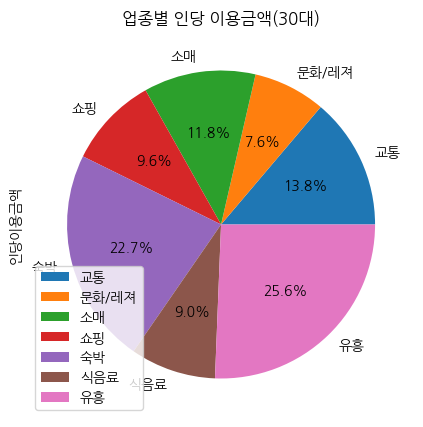

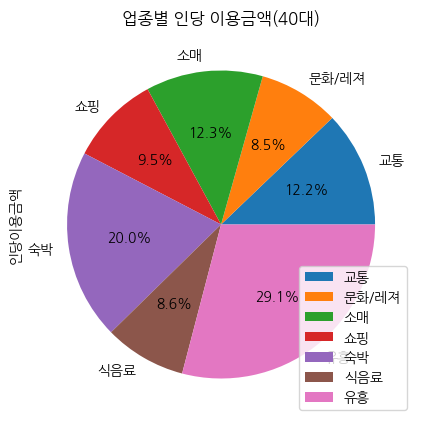

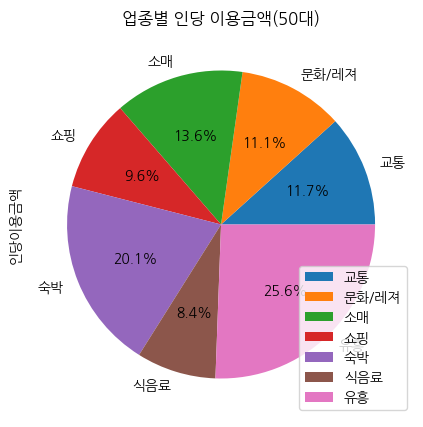

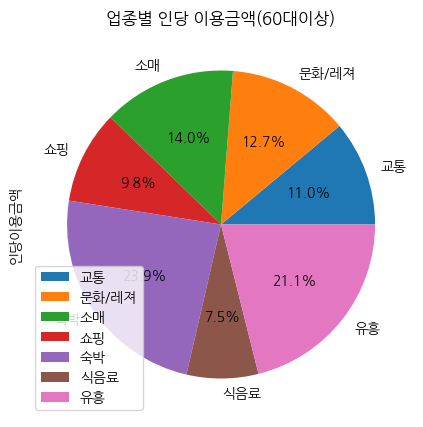

In [69]:
# 파이차트를 그려서 각 연령대의 업종별로 인당 이용금액 그리기
# for문을 활용

for age in groupby_age_market['연령대'].unique():
    data = groupby_age_market[groupby_age_market['연령대'] == age]
    data.plot(kind='pie', labels=data['업종명'], y='인당이용금액', autopct='%.1f%%')
    plt.title(f'업종별 인당 이용금액({age})')
    plt.xticks(rotation=90)
    plt.show()

/tmp/ipykernel_117/214476284.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_age_ym = jeju_card_df.groupby(['연령대', '연월']).sum(numeric_only=True).reset_index()
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or ob

<Axes: xlabel='연령대', ylabel='이용금액'>

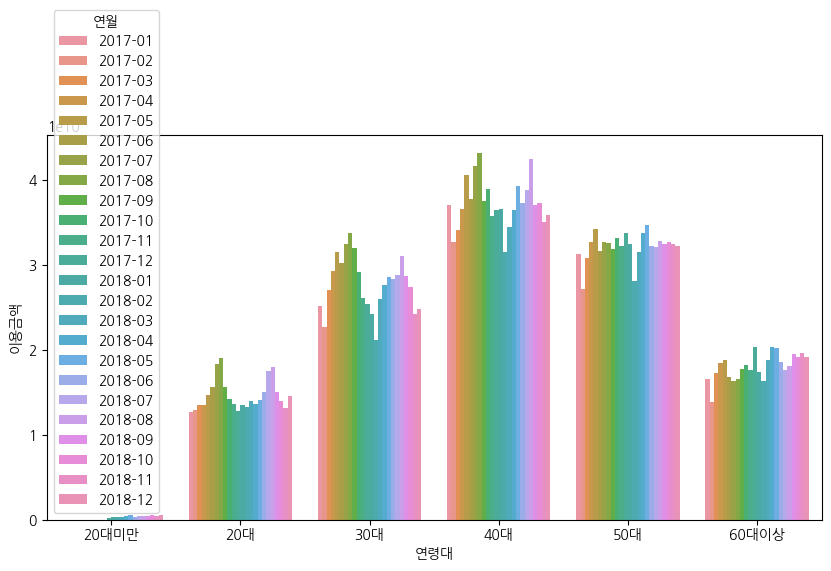

In [73]:
# 연령대별.연월별 이용 금액 시각화\
groupby_age_ym = jeju_card_df.groupby(['연령대', '연월']).sum(numeric_only=True).reset_index()
sns.barplot(data=groupby_age_ym, x='연령대', y='이용금액', hue='연월')

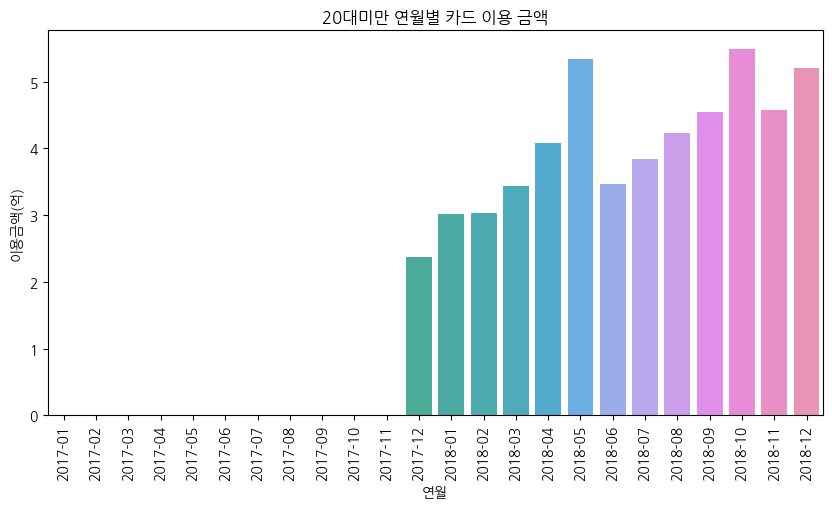

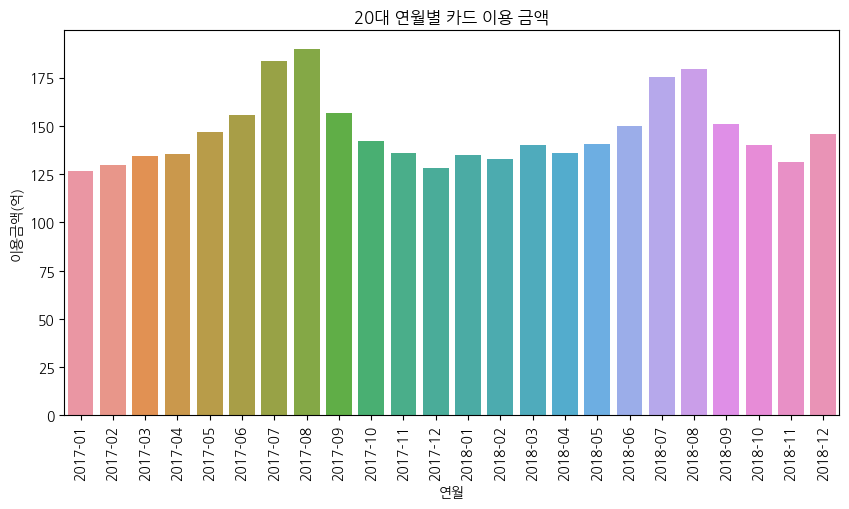

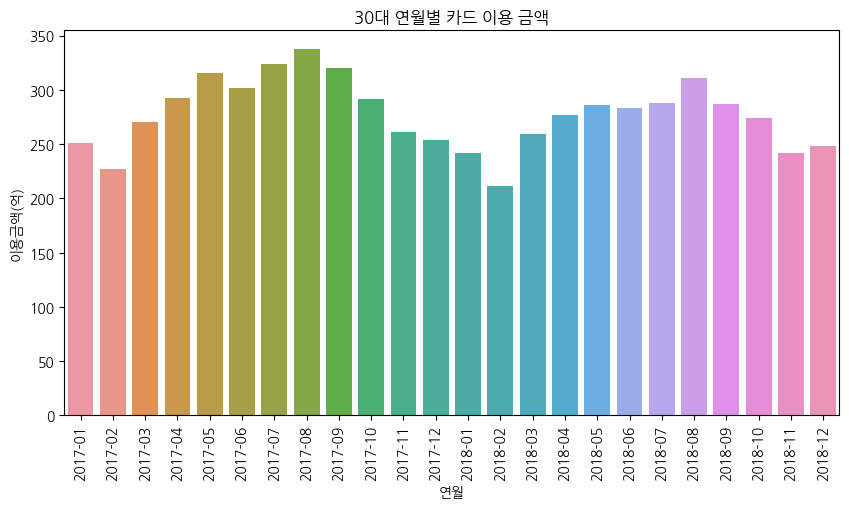

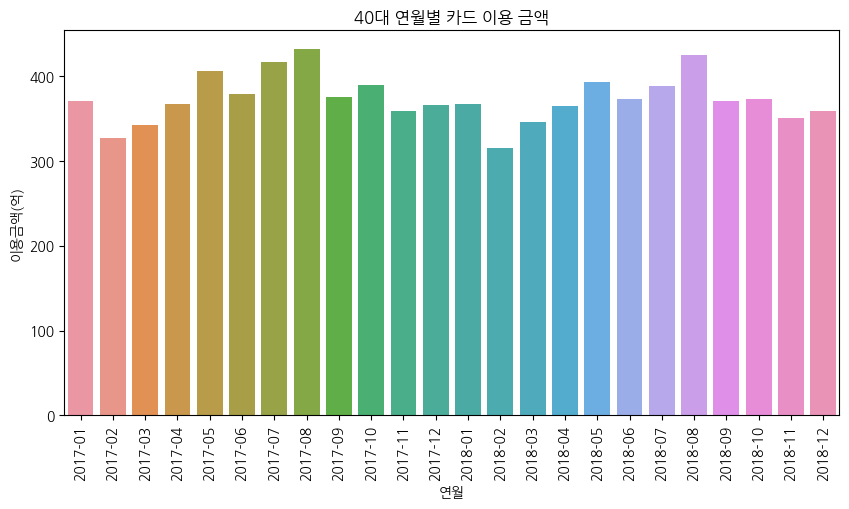

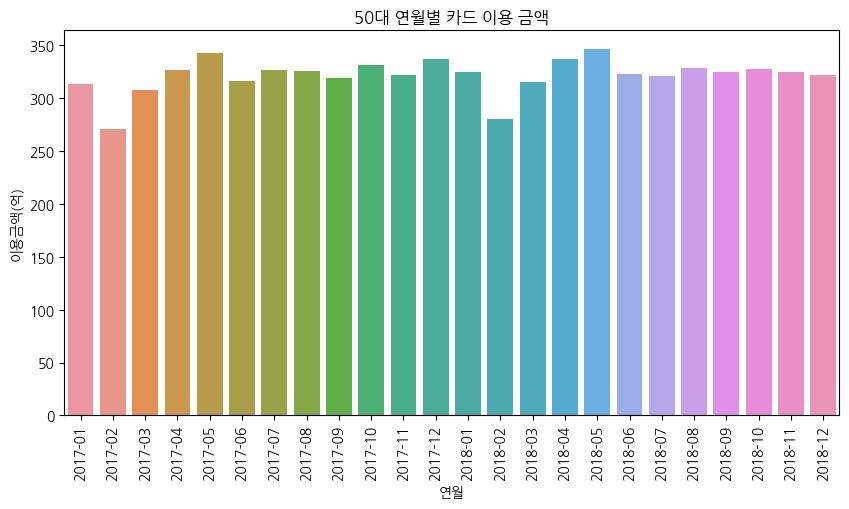

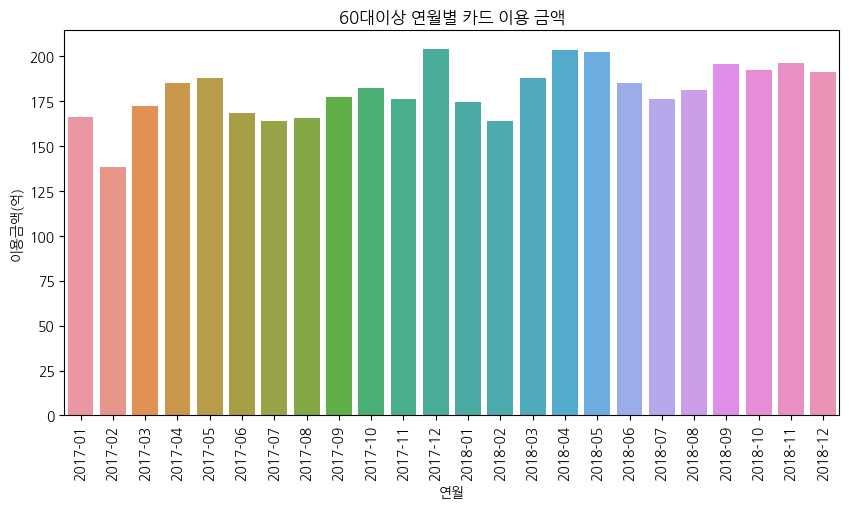

In [75]:
for age in groupby_age_ym['연령대'].unique():
    data = groupby_age_ym[groupby_age_ym['연령대'] == age]
    sns.barplot(data=data, x='연월', y='이용금액')
    plt.title(f'{age} 연월별 카드 이용 금액')
    plt.xticks(rotation=90)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
    plt.ylabel('이용금액(억)')
    plt.show()